In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [3]:
META = yf.download('META', start='2021-11-01', end='2022-11-01')
META.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,31518900
2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000
2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500
2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300
2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800


In [4]:
META ['Open-Close'] = META .Open - META .Close
META ['High-Low'] = META .High - META .Low
X = META [['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-11-01,-3.940002,7.450012
2021-11-02,3.300018,10.990021
2021-11-03,-4.130005,8.949982
2021-11-04,-1.839996,4.619995
2021-11-05,-0.820007,7.149994


In [5]:
y = np.where(META ['Close'].shift(-1) > META ['Close'], 1, -1)
y

array([-1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1

In [6]:
split_percentage = 0.8
split = int(split_percentage * len(META ))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [7]:
classifier = SVC().fit(X_train, y_train)

In [8]:
META ['Predicted_Signal'] = classifier.predict(X)
META ['META_Returns'] = META.Close.pct_change()
META ['Strategy_Returns'] = META.META_Returns * META .Predicted_Signal.shift(1)
META ['Cumulative_Returns'] = META ['META_Returns'].cumsum()
META ['Cumulative_Strategy_Returns'] = META ['Strategy_Returns'].cumsum()
META.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,META_Returns,Strategy_Returns,Cumulative_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,
2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,31518900,-3.940002,7.450012,-1,NaN,NaN,NaN,NaN
2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000,3.300018,10.990021,-1,-0.005758,0.005758,-0.005758,0.005758
2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500,-4.130005,8.949982,-1,0.010790,-0.010790,0.005032,-0.005032
2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300,-1.839996,4.619995,-1,0.012756,-0.012756,0.017788,-0.017788
2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800,-0.820007,7.149994,-1,0.015721,-0.015721,0.033509,-0.033509


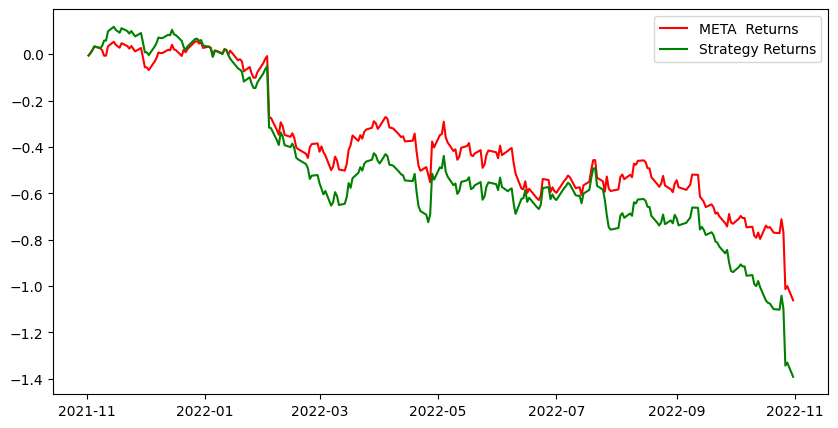

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(META ['Cumulative_Returns'], color='r', label = 'META  Returns')
plt.plot(-META ['Cumulative_Strategy_Returns'], color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [10]:
# calculate accuracy

print("For SVM model:")
print("Accuracy: ", accuracy_score(y_test, META["Predicted_Signal"][split:]) * 100, "%")
print("Mean Absolute Error: ", mean_absolute_error(y_test, META["Predicted_Signal"][split:]))

For SVM model:
Accuracy:  62.745098039215684 %
Mean Absolute Error:  0.7450980392156863
